# ML Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the training data

In [9]:
df_train = pd.read_csv('Final_train_data.csv', index_col=0)

# Defining the X (sparse matrix) and Y using TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(df_train['lem_stpwrd'])
inp = tfidf_vectorizer.transform(df_train['lem_stpwrd'])
out = df_train['label']

# Importing all important libraries

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold


## Base Model Logistic

In [14]:
# ngram (2,2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))
print(lm.score(xtest,ytest))
print(recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.19      0.32       700
           1       0.82      1.00      0.90      2510

    accuracy                           0.82      3210
   macro avg       0.90      0.60      0.61      3210
weighted avg       0.85      0.82      0.77      3210

0.8233644859813084
0.999601593625498 0.8159349593495935 0.8984780662488809


##### Number of columns and rows for n_gram 2,2

In [33]:
inp.shape

(10699, 40402)

In [3]:
n_22 = pd.Series([0.8233644859813084,0.999601593625498,0.8159349593495935,0.8984780662488809])

In [16]:
# ngram (1,2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))
print(lm.score(xtest,ytest))
print(recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76       700
           1       0.91      0.99      0.95      2510

    accuracy                           0.91      3210
   macro avg       0.93      0.82      0.86      3210
weighted avg       0.92      0.91      0.91      3210

0.9137071651090343
0.9900398406374502 0.907928388746803 0.9472079283400038


##### Number of columns and rows for n_gram 1,2

In [31]:
inp.shape

(10699, 46109)

In [2]:
n_12 = pd.Series([0.9137071651090343, 0.9900398406374502,0.907928388746803,0.9472079283400038])

In [56]:
col = pd.Series(['Accuracy','Recall','Precision','F1_Score'])
n_gram_comparison = pd.DataFrame([n_12,n_22])
n_gram_comparison.columns = col
n_gram_comparison.rename(index={0:'Uni & bigrams',1:'Only bigrams'}, inplace=True)
round(n_gram_comparison.T,2)

,Uni & bigrams,Only bigrams
Accuracy,0.91,0.82
Recall,0.99,1.00
Precision,0.91,0.82
F1_Score,0.95,0.90


<Figure size 720x720 with 0 Axes>

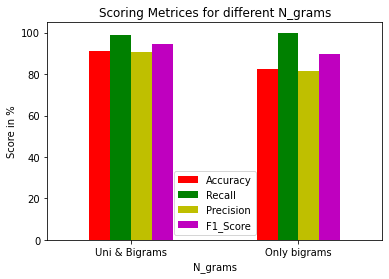

In [53]:
plt.figure(figsize = (10,10))
(n_gram_comparison*100).plot(kind = 'bar', color ='rgym')
plt.title('Scoring Metrices for different N_grams')
plt.xlabel('N_grams')
plt.ylabel('Score in %')
plt.xticks(ticks = [0,1], labels = ['Uni & Bigrams', 'Only bigrams'], rotation = 360)
plt.show()

- Observation:
    - Only recall is 0.009% higher for 2_2 over 1_2, otherwise all other performance metrices are higher for 1_2
    - Therfore, going ahead with 1_2 as the n_grams

Use the standard error of the coefficient to measure the precision of the estimate of the coefficient. The smaller the standard error, the more precise the estimate

# Model selection

In [203]:
# 7 models are considered

clf1 = LogisticRegression(random_state=20)
clf2 = DecisionTreeClassifier(random_state=20)
clf3 = RandomForestClassifier(random_state=20)
clf4 = AdaBoostClassifier(random_state=20) 
clf5 = GradientBoostingClassifier(random_state=20)
clf6 = XGBClassifier(random_state=20)
clf7 = MultinomialNB()

In [204]:
kf=KFold(n_splits=7,shuffle=True,random_state=0)

In [205]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp, out, cv=kf, scoring = 'accuracy')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.928684610617075 0.0067075973177885264
DT 0.9302750904600314 0.005937629453877217
RF 0.9353213832007761 0.00426512635532303
Ada 0.9167208220232815 0.009513459669000923
GradB 0.9174688874724658 0.005785816960370999
XGB 0.9413032163512407 0.005452282006803475
MNB 0.8812038558450851 0.0112132786572926


In [206]:
result_acc = pd.DataFrame({'LR': [0.926535741557023, 0.009787399042762919],
'DT': [0.9311142640929075, 0.006040007708124705],
'RF': [0.9368173306598483, 0.010047115281094162],
'Ada': [0.9180300282790019, 0.005156194819078392],
'GradB': [0.9193388065096979, 0.009249880303348362],
'XGB': [0.9407424424232966, 0.0058717455007786115],
'MNB': [0.8804570133245413, 0.007429741230610971]})

In [207]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp, out, cv=kf, scoring='roc_auc')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.98672822862413 0.0019610186649018993
DT 0.9042211655657011 0.008885227735181281
RF 0.9851493667576839 0.002259516555693865
Ada 0.9731930813768164 0.003764173459294648
GradB 0.9765460560316076 0.002416222815413283
XGB 0.9834913297898431 0.002079524921669796
MNB 0.9826950075575823 0.0023679073957210725


In [208]:
result_roc_auc = pd.DataFrame({'LR' :[0.9864421446993595, 0.0033171350324289663],
'DT' :[0.906891305907391, 0.00911691829989416],
'RF' :[0.9853350730148398, 0.0030916044931385447],
'Ada' :[0.9730682207704563, 0.0027152430635785808],
'GradB' :[0.9763433288629944, 0.002941595964556761],
'XGB' :[0.9837292961886105, 0.00279718263495985],
'MNB': [0.9822920503860163, 0.0025868310300022025]})

In [209]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp, out, cv=kf, scoring='f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.9562733731534176 0.004303997195614957
DT 0.9556210639515336 0.0035446371221001262
RF 0.9600879602552513 0.0025680965738249283
Ada 0.9471008325199561 0.005133287588264315
GradB 0.9496389785816918 0.00391739079515696
XGB 0.9624185268765791 0.0030329261022353587
MNB 0.9298914594222624 0.0068431537079652344


In [210]:
result_f1 = pd.DataFrame({'LR': [0.9562733731534176, 0.004303997195614957],
'DT': [0.9556210639515336, 0.0035446371221001262],
'RF': [0.9600879602552513, 0.0025680965738249283],
'Ada': [0.9471008325199561, 0.005133287588264315],
'GradB' :[0.9507309915910401, 0.005403060388390704],
'XGB' :[0.961974941259396, 0.0038454684442672878],
'MNB': [0.9295141302067618, 0.0042576562473364945]})

In [211]:
result_comparison = pd.concat([result_acc,result_roc_auc,result_f1], axis=0,keys=['accuracy','roc_auc','f1'])

In [212]:
iterables = [['Accuracy','roc_auc','f1'],['BA','Coef_Var']]
indexx = pd.MultiIndex.from_product(iterables, names=['Metrix', 'Score'])

In [213]:
result_comparison.set_index(indexx, inplace=True)

### Comparison of ML Model scores on Training Data

In [214]:
round(result_comparison,4)

LR      DT      RF     Ada   GradB     XGB     MNB
Metrix   Score                                                           
Accuracy BA        0.9265  0.9311  0.9368  0.9180  0.9193  0.9407  0.8805
         Coef_Var  0.0098  0.0060  0.0100  0.0052  0.0092  0.0059  0.0074
roc_auc  BA        0.9864  0.9069  0.9853  0.9731  0.9763  0.9837  0.9823
         Coef_Var  0.0033  0.0091  0.0031  0.0027  0.0029  0.0028  0.0026
f1       BA        0.9563  0.9556  0.9601  0.9471  0.9507  0.9620  0.9295
         Coef_Var  0.0043  0.0035  0.0026  0.0051  0.0054  0.0038  0.0043

##### Verdict: 

- Accuracy: XGBBoost
- Roc_Auc : LogisticReg
- F1      : XGBBoost  

- XGB Model is chosen

# Tuning the Model Hyperparameter

In [173]:
# Loop to get the best n_estimators
be=[]
ve=[]
kf = KFold(n_splits=7,shuffle=True,random_state=20)
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    XGB = XGBClassifier(n_estimators=i,random_state=20)
    score=cross_val_score(XGB, inp, out, cv=kf, scoring='f1')
    print('\nn_estimator:',i)
    print('Bias Accuracy',np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    be.append(np.mean(score))
    ve.append(np.std(score)/np.mean(score))


n_estimator: 5
Bias Accuracy 0.9312285653943837
Variance Error 0.0034467651740916374

n_estimator: 10
Bias Accuracy 0.9382249331094183
Variance Error 0.004286450159636038

n_estimator: 20
Bias Accuracy 0.9467907274700146
Variance Error 0.004409236376022193

n_estimator: 40
Bias Accuracy 0.9578998125687745
Variance Error 0.003953469153935464

n_estimator: 60
Bias Accuracy 0.9602815903225329
Variance Error 0.005324512121581685

n_estimator: 80
Bias Accuracy 0.9610312591765509
Variance Error 0.0044533918232517785

n_estimator: 100
Bias Accuracy 0.961974941259396
Variance Error 0.0038454684442672878

n_estimator: 120
Bias Accuracy 0.9618564748289391
Variance Error 0.0036327952462168354

n_estimator: 150
Bias Accuracy 0.9631389924165829
Variance Error 0.0033296482301388105

n_estimator: 200
Bias Accuracy 0.9635755419320164
Variance Error 0.003303351093405968

n_estimator: 250
Bias Accuracy 0.9631212911819238
Variance Error 0.0036547220320706036

n_estimator: 300
Bias Accuracy 0.96391403075

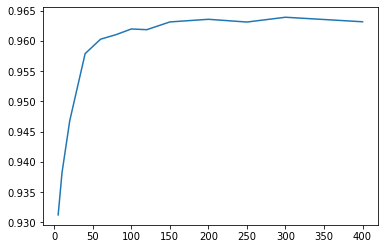

In [174]:
from matplotlib import pyplot as plt
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],be)

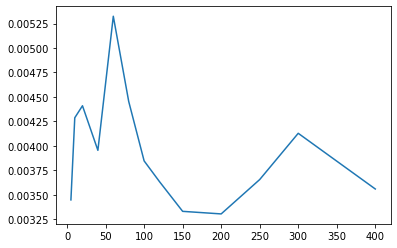

In [175]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve)

- On comparing different n_estimators, n_estimators = 200 has the best BA & VE tradeoff 
    - Therefore, choosing n_estimators = 20 for the model and GridSearchCV

# GridSearchCV

In [176]:
import time 
  
# store starting time 
begin = time.time()

In [177]:
# Grid Search CV

from sklearn.model_selection import GridSearchCV


kf = KFold(n_splits=7,shuffle=True,random_state=20)
XGB = XGBClassifier()
parameters = {
    "n_estimators":[200],
    "max_depth":[10,15,20,25,30,35],
    "learning_rate":[0.01,0.1,1,10,100]
}


cv = GridSearchCV(XGB,parameters,cv=kf)
cv.fit(inp,out)
print(f" Best score is: {cv.best_score_} with parameters: {cv.best_params_}")

 Best score is: 0.9419568105629726 with parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}


In [178]:
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 

Total runtime of the program is 3665.3081543445587


In [179]:
(end - begin)/3600 # Hours for execution.

1.0181411539845997

In [331]:
# Result from gridsearchCV
res = pd.DataFrame(cv.cv_results_)

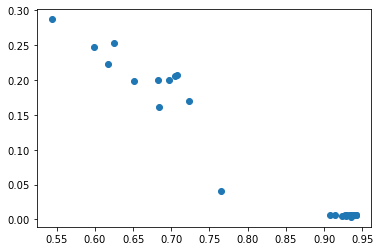

In [332]:
plt.scatter(res['mean_test_score'],res['std_test_score'])
plt.show()

In [333]:
res[(res['mean_test_score'] > 0.94) & (res['std_test_score'] < 0.006)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
7,18.536839,0.269888,0.053545,0.011379,0.1,15,200,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.938522,0.950948,0.940484,0.933246,0.944372,0.948298,0.937827,0.941957,0.005779,1
8,21.208804,0.117591,0.051312,0.007043,0.1,20,200,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.937868,0.950948,0.937214,0.936518,0.945681,0.946990,0.933901,0.941303,0.005985,3


In [335]:
0.941957 - 0.941303, 0.005779-0.005985


# Going ahead with max_depth = 15, learning_rate = 0.1, n_estimators: 200

(0.0006540000000000434, -0.00020599999999999959)

# Fitting the training data to the tuned model
# Model Training

In [12]:
XGB_Model = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=200,random_state=20)

XGB_Model.fit(inp,out)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Scoring Metrices

In [13]:
# Scoring metrices
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score

In [14]:
y_pred = XGB_Model.predict(inp)

print('Accuracy: ',XGB_Model.score(inp,out))
print('F1: ', f1_score(out,y_pred)),
print('Precision:',precision_score(out,y_pred)) 
print('Recall:', recall_score(out,y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(out,y_pred))
print('class_report:', classification_report(out,y_pred))

Accuracy:  0.9816805308907375
F1:  0.9883277751310149
Precision: 0.9960388908894491
Recall: 0.9807351376905803

Confusion Matrix:
 [[2205   33]
 [ 163 8298]]
class_report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2238
           1       1.00      0.98      0.99      8461

    accuracy                           0.98     10699
   macro avg       0.96      0.98      0.97     10699
weighted avg       0.98      0.98      0.98     10699



## K-fold CV, model eval

In [267]:
kf = KFold(n_splits=7,shuffle=True,random_state=20)
score = cross_val_score(XGB_Model, inp, out, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.962922574055865 0.0038123575384191198


In [268]:
scores_tfidf = pd.DataFrame({'Accuracy': [0.9816805308907375],'F1 Score':[0.9883277751310149] ,'Precision': [0.9960388908894491],'Recall': [0.9807351376905803], 'Bias Accuracy':[0.962922574055865 ],'Coef of variation':[0.0038123575384191198]})

# Applying the Testing Data on the Tuned Model

### Importing 400 sample data

In [15]:
df_test_sample = pd.read_excel('sample_addinglabel.xlsx', index_col = 0)

In [16]:
df_test_sample.reset_index(drop=True, inplace=True)

In [17]:
X_test = tfidf_vectorizer.transform(df_test_sample['lem_stpwrd'])

In [18]:
# Getting the pred and probab after fitting the test model

xgb_pred = pd.DataFrame(XGB_Model.predict(X_test))
xgb_pred.rename(columns=({0:'Model_Pred'}), inplace=True)

xgb_proba = pd.DataFrame(XGB_Model.predict_proba(X_test)[:,0])
xgb_proba.rename(columns=({0:'Probab_0'}), inplace=True)

xgb_pred.reset_index(drop=True, inplace=True)
xgb_proba.reset_index(drop=True,inplace=True)

# Concatenate both pred and proba

sample_xgb_pred_proba = pd.concat([xgb_pred,xgb_proba], axis=1)

In [19]:
sample_xgb_pred_proba.reset_index(drop=True, inplace=True)

df_result = pd.concat([df_test_sample,sample_xgb_pred_proba], axis=1)

df_result['Mod_Anomaly'] = np.where((df_result['reviews.rating'] == df_result['Model_Pred']),0,1)

df_result['Anomaly'].value_counts()

0    384
1     16
Name: Anomaly, dtype: int64

In [20]:
df_result['Mod_Anomaly'].value_counts()

0    349
1     51
Name: Mod_Anomaly, dtype: int64

### 400 sample data - Model Scores 

In [ ]:
# Delete the below cell

In [21]:
y_pred = df_result['Mod_Anomaly']
y_true = df_result['Anomaly']

print('F1: ', f1_score(y_true,y_pred)),
print('Precision:',precision_score(y_true,y_pred)) 
print('Recall:', recall_score(y_true,y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_true,y_pred))
print('class_report:', classification_report(y_true,y_pred))

# weighted f1-score is important, should be considered for hypothesis testing

F1:  0.47761194029850745
Precision: 0.3137254901960784
Recall: 1.0

Confusion Matrix:
 [[349  35]
 [  0  16]]
class_report:               precision    recall  f1-score   support

           0       1.00      0.91      0.95       384
           1       0.31      1.00      0.48        16

    accuracy                           0.91       400
   macro avg       0.66      0.95      0.71       400
weighted avg       0.97      0.91      0.93       400



- Observation:
    - All 16 anomalies in the 400 records are predicted correctly by the model
    - False Negative is the costliest error for our Anomaly detection, and there are no FN here, therefore Model performance is good.
    - Threshold can be altered a bit to improve FP, but a tradeoff must be carefully made by not compromising much on the FN.

#### Analysing the 51 records that model predicted as Anomalies

In [7]:
df = pd.read_csv('Anomaly_Before_Threshold.csv', index_col = 0)

In [11]:
df[(df['Mod_Anomaly']==1) & (df['Anomaly']==0)]

,reviews.rating,reviews.text,reviews.title,lem_stpwrd,Anomaly,Model_Pred,Probab_0,Mod_Anomaly
47,1,Glad I ordered this many. I had no idea I'd us...,"Quick, quality, quantity. Happy customer here.",quick quality quantity happy customer glad ord...,0,0,0.925889,1
84,1,Great batteries here! These last just as long ...,"High Quality, Lasts As Long As Energizer/Durac...",high quality last long energy duracell great b...,0,0,0.996977,1
116,1,They are batteries. They make my possessions w...,They make power happen.,make power happen battery make possession requ...,0,0,0.895473,1
128,1,I bought this to replace my wife's (1st genera...,Even better than before,even better before bought replace wife's st ge...,0,0,0.809533,1
136,1,Wow what doesn't this do. Enjoy listening and ...,The future,future doesn't do enjoy listening finding do,0,0,0.831425,1
171,1,Echo is not only fun but a valuable tool. It s...,Echo is a valuable device,echo valuable device echo not fun but valuable...,0,0,0.672396,1
182,1,Big Echo big sound! No need for a Bluetooth sp...,echo,echo big echo big sound no need bluetooth speaker,0,0,0.876817,1
197,1,"As a rule, it's hard to tell the difference be...","Good Enough, Sensible Packaged, At A Good Price",good enough sensible package good price rule h...,0,0,0.827483,1
199,1,Bulk batteries is a must when you have three k...,Work well. Cost less.,work well cost le bulk battery must three kiss...,0,0,0.760674,1
205,0,You need gooooood wifi for this. If the wifi i...,Amazon echo black,amazon echo black need gooooood wife wife isn'...,0,1,0.007247,1


## Changing the threshold and observing the Anomalies prediction and detection

In [8]:
df1 = df.copy()

### Hypothesis testing on the weighted recall score
- Null Hypothesis, Ho: Weighted Recall Score = 95%
- Alternate Hypothesis, Ha: Weighted Recall Score != 95%

In [18]:
anomalies_pval = []
for i in np.arange(0.2,0.9,0.05):
    df1['Model_Pred'] = df1['Probab_0'].apply(lambda x: 0 if x > i else 1)

    df1['Mod_Anomaly'] = np.where((df1['reviews.rating'] == df1['Model_Pred']),0,1)

    y_pred = df1['Mod_Anomaly']
    y_true = df1['Anomaly']
    
    print('\n\nThreshold:',i)
    print('F1: ', f1_score(y_true,y_pred)),
    print('Precision:',precision_score(y_true,y_pred)) 
    print('Recall:', recall_score(y_true,y_pred))
    print('\nConfusion Matrix:\n', confusion_matrix(y_true,y_pred))
    print('class_report:\n', classification_report(y_true,y_pred))
    
    p = recall_score(y_true,y_pred, average = 'weighted')
    P = 0.95
    n = 400
    sd = np.sqrt(P*(1-P)/n)
    z = (p-P)/sd
    print('P_value: ',2*ss.norm.cdf(z))
    anomalies_pval.append(2*ss.norm.cdf(z))
    print('weighted_recall: ', p)



Threshold: 0.2
F1:  0.5423728813559322
Precision: 0.37209302325581395
Recall: 1.0

Confusion Matrix:
 [[357  27]
 [  0  16]]
class_report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       384
           1       0.37      1.00      0.54        16

    accuracy                           0.93       400
   macro avg       0.69      0.96      0.75       400
weighted avg       0.97      0.93      0.95       400

P_value:  0.10829365589901001
weighted_recall:  0.9325


Threshold: 0.25
F1:  0.5614035087719299
Precision: 0.3902439024390244
Recall: 1.0

Confusion Matrix:
 [[359  25]
 [  0  16]]
class_report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       384
           1       0.39      1.00      0.56        16

    accuracy                           0.94       400
   macro avg       0.70      0.97      0.76       400
weighted avg       0.98      0.94      0.95       400

P_value

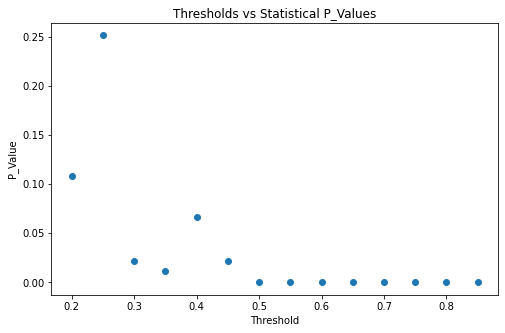

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(np.arange(0.2,0.9,0.05), anomalies_pval)
plt.title('Thresholds vs Statistical P_Values')
plt.xlabel('Threshold')
plt.ylabel('P_Value')
plt.show()

- Points to be noted:
    - The selected threshold: 0.4 (0.399)
    - P_val for 0.4: 0.06645 > 0.05: Accept Ho.  (conclusion for Hypothesis testing)
    - Reason for not selecting threshold of 0.2 and 0.25: 
        - The sentiment analysis is imbalanced (higher FP and very low FN)
    

### Performance Metrices for the chosen Threshold

In [39]:
i = 0.4
df1['Model_Pred'] = df1['Probab_0'].apply(lambda x: 0 if x > i else 1)

df1['Mod_Anomaly'] = np.where((df1['reviews.rating'] == df1['Model_Pred']),0,1)

y_pred = df1['Mod_Anomaly']
y_true = df1['Anomaly']


print('\n\nThreshold:',i)
print('F1: ', f1_score(y_true,y_pred)),
print('Precision:',precision_score(y_true,y_pred)) 
print('Recall:', recall_score(y_true,y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_true,y_pred))
print('class_report:\n', classification_report(y_true,y_pred))

p = recall_score(y_true,y_pred, average = 'weighted')
P = 0.95
n = 400
sd = np.sqrt(P*(1-P)/n)
z = (p-P)/sd
print('P_value: ',2*ss.norm.cdf(z))
anomalies_pval.append(2*ss.norm.cdf(z))
print('weighted_recall: ', p)



Threshold: 0.4
F1:  0.5333333333333333
Precision: 0.36363636363636365
Recall: 1.0

Confusion Matrix:
 [[356  28]
 [  0  16]]
class_report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       384
           1       0.36      1.00      0.53        16

    accuracy                           0.93       400
   macro avg       0.68      0.96      0.75       400
weighted avg       0.97      0.93      0.95       400

P_value:  0.06645742001693253
weighted_recall:  0.93


### Analysis on the Model's wrong predictions

##### Analyzing the False Positives (28)

In [44]:
pd.set_option('max_colwidth', 1)
df1[(df1['Anomaly']==0) & (df1['Mod_Anomaly'])==1]

,reviews.rating,reviews.text,reviews.title,lem_stpwrd,Anomaly,Model_Pred,Probab_0,Mod_Anomaly
47,1,Glad I ordered this many. I had no idea I'd use nearly half the box as soon as I opened it. Now I need to do the same with AA size as many applications say specifically not to use rechargeables. Believe them! I tried it once before and pretty much melted down the item and destroyed the batteries as well. Apparently they are not made to supply as much current and they will let out the (magic) smoke. These came in quickly and are just what I needed,"Quick, quality, quantity. Happy customer here.",quick quality quantity happy customer glad ordered many no idea i'd use nearly half box soon opened need do size many application say specifically not use rechargeables believe tried before pretty much melted item destroyed battery well apparently not made supply much current let magic smoke came quickly needed,0,0,0.925889,1
84,1,"Great batteries here! These last just as long as Duracell or Energizer, but you get way more for your money! I mostly use these for video game controllers and remote controls. They last as long as I expect and I have never had a bad (dead) one. I don't understand why anyone would pay more for the expensive brands. These are NOT dollar store batteries. High quality and durability with a price that lets me always have spares ready to go! Since I found these I have been ordering them over and over in multiple sizes.","High Quality, Lasts As Long As Energizer/Duracell!!",high quality last long energy duracell great battery last long duracell energy but get way money mostly use video game controller remote control last long expect never bad dead one don't understand anyone would pay expensive band not dollar store battery high quality disability price let always spare ready go since found ordering multiple size,0,0,0.996977,1
116,1,"They are batteries. They make my possessions which require batteries to do their thing. I have not noticed a difference in the time between battery changes because I have more important things to do, but with this price, I'm ok if it isn't the longest lasting in the world. Side note, the packaging on these is quite wonderful. No more taking my life into my hands trying to get at a couple of batteries.",They make power happen.,make power happen battery make possession require battery do thing not noticed difference time between battery change important thing do but price i'm ok isn't longest lasting world side note packing quite wonderful no taking life hand trying get couple battery,0,0,0.895473,1
128,1,"I bought this to replace my wife's (1st generation) Kindle Fire. She likes it even better than the old one, especially the pinsharp screen.",Even better than before,even better before bought replace wife's st generation kindle fire like even better old one especially pinsharp screen,0,0,0.809533,1
136,1,Wow what doesn't this do. Enjoy listening and finding out what it can do.,The future,future doesn't do enjoy listening finding do,0,0,0.831425,1
148,1,"I love my Amazon Fire HD 8. It's not too small and not too big. I was looking at other tablets, and decided on the Amazon Fire HD 8 because of the price, and because I have Amazon Prime, I purchased it online at Best Buy, and then picked it up at the store on Black Friday. It is my first tablet, and so I wanted to start with one that I can have fun with, and I am. I do have a laptop for important things.",First Tablet,first tablet love amazon fire 8 not small not big wa looking tablet decided amazon fire 8 price amazon prime purchased online best buy picked store black friday first tablet wanted start one fun do lawton important thing,0,0,0.416825,1
162,1,"I must say I have always been making jokes about Amazon and their devices, but after getting the Amazon Fire 7, I must admit I have been wrong. This little device is amazing for such a low price. You honestly get a lot for your money, and I can definitely recommend it to people who want a

- Observation:
    - These 28 records' probab_0 scores are extreme towards positive or negative sentiments, therefore they do not alter on varying differen thresholds (sentiment)

### WordCloud

##### In actuality: Positive 
##### Model Pred : Negatives

In [104]:
from wordcloud import WordCloud

In [103]:
my_list = ['melted item', 'destroyed, not made to supply',  "dont pay more expensive brands", "no difference ",  "not too small not very big, isnt fun", "No need", "wont notice no difference", "wifi isnt good not work"]

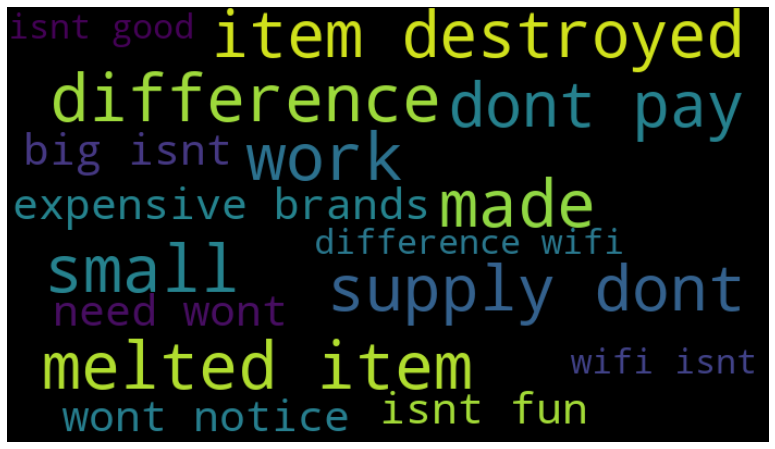

In [105]:
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 700, height = 400,max_font_size=60, max_words=2000, collocation_threshold = 3, stopwords= None).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

##### In actuality: Negatives 
##### Model Pred : Positives

In [107]:
mylist1 = ['3 perfect', 'awesome', 'only great', 'more sturdy', 'reliable','loved her', 'was easy', 'looked great']

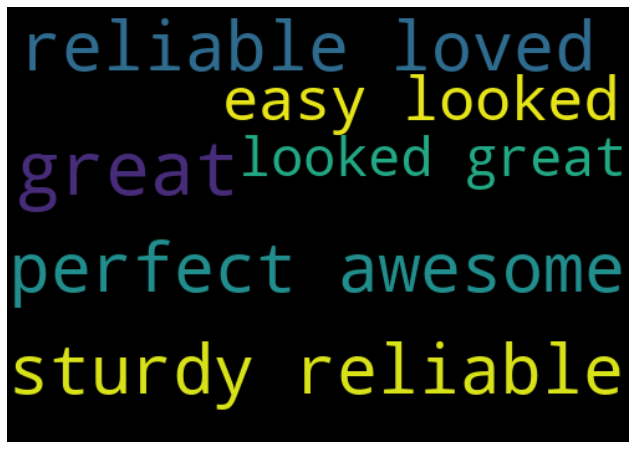

In [110]:
unique_string=(" ").join(mylist1)
wordcloud = WordCloud(width = 500, height = 350,max_font_size=60, max_words=2000, collocation_threshold = 3, stopwords= None).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

---

## Changing Threshold and observing the Confusion Matrix of Sentiment Analysis of training data

In [59]:
prob=XGB_Model.predict_proba(inp)
prob_1=prob[:,0]

In [60]:
for i in np.arange(0.2,0.9,0.05):
    ypred1=np.zeros([len(out),1])
    ypred1[prob_1<=i]=1
    print("The report for Th = ",i)
    print(confusion_matrix(out,ypred1))
    print(classification_report(out,ypred1))

The report for Th =  0.2
[[2230    8]
 [ 573 7888]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.88      2238
           1       1.00      0.93      0.96      8461

    accuracy                           0.95     10699
   macro avg       0.90      0.96      0.92     10699
weighted avg       0.96      0.95      0.95     10699

The report for Th =  0.25
[[2230    8]
 [ 489 7972]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2238
           1       1.00      0.94      0.97      8461

    accuracy                           0.95     10699
   macro avg       0.91      0.97      0.93     10699
weighted avg       0.96      0.95      0.96     10699

The report for Th =  0.3
[[2228   10]
 [ 409 8052]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2238
           1       1.00      0.95      0.97      8461

    accuracy             

## Changing Threshold and observing the Confusion Matrix of Sentiment Analysis of testing data

In [27]:
probb=XGB_Model.predict_proba(X_test)
prob_2=probb[:,0]

In [28]:
for i in np.arange(0.2,0.9,0.05):
    y_true = df_test_sample['reviews.rating']
    ypred1=np.zeros([len(y_true),1])
    ypred1[prob_2<=i]=1
    print("The report for Th = ",i)
    print(confusion_matrix(y_true,ypred1))
    print(classification_report(y_true,ypred1))

The report for Th =  0.2
[[175  25]
 [ 18 182]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       200
           1       0.88      0.91      0.89       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

The report for Th =  0.25
[[175  25]
 [ 16 184]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       200
           1       0.88      0.92      0.90       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

The report for Th =  0.3
[[170  30]
 [ 16 184]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       200
           1       0.86      0.92      0.89       200

    accuracy                         

##### Project Major Steps:
    - Training Record: 3k (Reviews - ImdB, Yelp, Amazon) + 7k (Amazon Electronics Review)
    - Testing Record: 40k, downsized to 400 due to the need of manual labelling of anomalies.
    - Machine Learning Model: XGB Classifier chosen, as it gave the best results.
    - Threshold Tuning: 0.4, based on hypothesis and balancing of sentiment classification.

### Conclusion:
    - Tuned Model is correctly predicting all the anomalies present in the test data. 
    - It detects 28 records as anomalies (False Positives), however False Negatives are zero and are more costly error according to the project's objective. Thus, the objective of the project is achieved. 

# ------------------------------------------- THE END --------------------------------------------------